## 1.Dataloader重要参数：
### epoch：遍历所有点的次数：一次正向+反向的次数
### batch_size:子集大小
### iteration：总数点/子集，也就是遍历所有点需要循环次数（或者是可以并行）
#### 例子：1000点，子集为500，需要遍历2次才能运算完，如果是并行的话就另说

## 2.插入图片的方法：Ipython.display.Image和{img src='相对路径'，width=，height=}

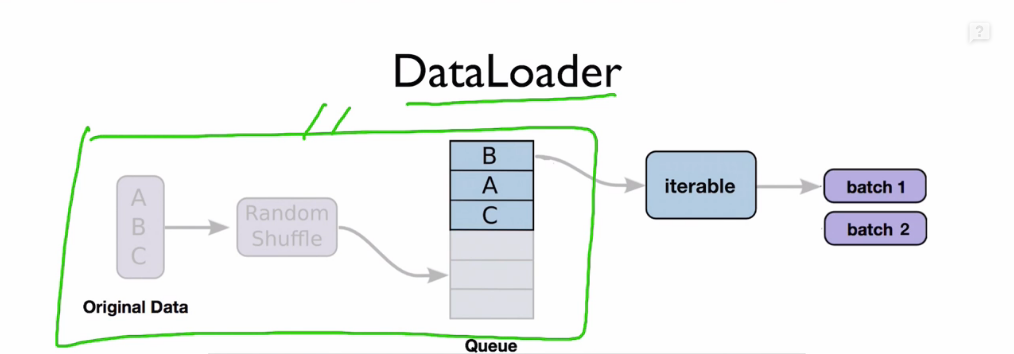

In [29]:
from IPython.display import Image
Image(filename = 'C:/Users/Administrator/Pytorch study/Pytorch by Sung Kim/dataloader.png', width=1000, height=600)

<img src='custom_dataloader.jpg', width=1000, height=600>

In [30]:
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader# ，大写，双大写
import pandas as pd


In [31]:
data=pd.read_csv('./diabetes.csv',delimiter=',')
x=data.iloc[:,0:-1]
x=x.values.reshape(np.size(x,0),-1)

In [32]:
type(x)

numpy.ndarray

## numpy中的ndarray转化成pytorch中的tensor : torch.from_numpy()

## pytorch中的tensor转化成numpy中的ndarray : numpy()

In [33]:
class DiabetesDataset(Dataset):
    def __init__(self):
        data=pd.read_csv('./diabetes.csv',delimiter=',')
        x=data.iloc[:,0:-1]
        x=x.values.reshape(np.size(x,0),-1)
        #self.x_data=Variable(torch.Tensor([x]))
        self.x_data=torch.from_numpy(x)
        y=data.iloc[:,-1]
        y=y.values.reshape(np.size(y),-1)
        #self.y_data=Variable(torch.Tensor([y]))
        self.y_data=torch.from_numpy(y)
        self.len=data.values.shape[0]
    
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len
    

In [34]:
dataset=DiabetesDataset()
trainloader=DataLoader(dataset=dataset,
                      batch_size=32,
                      shuffle=True,
                      num_workers=0)

## 3.enumerate() 函数用于将一个可遍历的数据对象,sequence -- 一个序列、迭代器或其他支持迭

## 代对象,start -- 下标起始位置

In [35]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1=torch.nn.Linear(8,6)
        self.l2=torch.nn.Linear(6,4)
        self.l3=torch.nn.Linear(4,1)
        self.sigmoid=torch.nn.Sigmoid()
        
        
    def forward(self,x):
        out1=self.sigmoid(self.l1(x))
        out2=self.sigmoid(self.l2(out1))
        y_pred=self.sigmoid(self.l3(out2))
        
        
        return y_pred


In [36]:
model=Model()
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

In [37]:
ii=int(np.size(x,0)/32) #浮点型变整型
for epoch in range(ii):
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        
        #这一段的问题在于inputs和labels利用P7审查，发现输入输出都为三维tensor，可能跟读入方式pandas有关有关系，
        inputs=inputs.numpy()
        inputs=Variable(torch.Tensor([inputs]))
        labels=labels.numpy()
        labels=Variable(torch.Tensor([labels]))
        
        y_pred=model(inputs)
        loss=criterion(y_pred,labels)
        print(epoch,i,loss.data[0])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


0 0 tensor(0.6648)
0 1 tensor(0.6543)
0 2 tensor(0.6721)
0 3 tensor(0.6778)
0 4 tensor(0.6696)
0 5 tensor(0.6367)
0 6 tensor(0.6584)
0 7 tensor(0.6283)
0 8 tensor(0.7079)
0 9 tensor(0.6866)
0 10 tensor(0.6569)
0 11 tensor(0.6230)
0 12 tensor(0.6766)
0 13 tensor(0.6772)
0 14 tensor(0.6526)
0 15 tensor(0.6413)
0 16 tensor(0.6504)
0 17 tensor(0.6750)
0 18 tensor(0.7149)
0 19 tensor(0.6510)
0 20 tensor(0.6880)
0 21 tensor(0.5905)
0 22 tensor(0.6094)
0 23 tensor(0.6341)
1 0 tensor(0.6768)
1 1 tensor(0.6771)
1 2 tensor(0.6334)
1 3 tensor(0.7216)
1 4 tensor(0.6056)
1 5 tensor(0.6769)
1 6 tensor(0.6761)
1 7 tensor(0.7225)
1 8 tensor(0.6206)
1 9 tensor(0.5594)
1 10 tensor(0.6769)
1 11 tensor(0.7075)
1 12 tensor(0.6468)
1 13 tensor(0.6912)
1 14 tensor(0.5851)
1 15 tensor(0.6134)
1 16 tensor(0.5963)
1 17 tensor(0.6771)
1 18 tensor(0.6294)
1 19 tensor(0.6093)
1 20 tensor(0.7166)
1 21 tensor(0.6285)
1 22 tensor(0.6450)
1 23 tensor(0.5721)
2 0 tensor(0.6798)
2 1 tensor(0.6067)
2 2 tensor(0.6629)
2 3

17 4 tensor(0.7157)
17 5 tensor(0.5166)
17 6 tensor(0.6621)
17 7 tensor(0.6421)
17 8 tensor(0.7016)
17 9 tensor(0.6052)
17 10 tensor(0.6596)
17 11 tensor(0.6417)
17 12 tensor(0.6614)
17 13 tensor(0.6821)
17 14 tensor(0.7316)
17 15 tensor(0.5863)
17 16 tensor(0.6602)
17 17 tensor(0.5867)
17 18 tensor(0.5655)
17 19 tensor(0.5833)
17 20 tensor(0.7021)
17 21 tensor(0.7005)
17 22 tensor(0.5865)
17 23 tensor(0.6816)
18 0 tensor(0.6016)
18 1 tensor(0.7386)
18 2 tensor(0.6226)
18 3 tensor(0.6240)
18 4 tensor(0.6244)
18 5 tensor(0.6217)
18 6 tensor(0.6828)
18 7 tensor(0.6399)
18 8 tensor(0.6422)
18 9 tensor(0.6801)
18 10 tensor(0.6425)
18 11 tensor(0.5651)
18 12 tensor(0.7619)
18 13 tensor(0.6026)
18 14 tensor(0.6616)
18 15 tensor(0.6023)
18 16 tensor(0.6416)
18 17 tensor(0.6244)
18 18 tensor(0.7002)
18 19 tensor(0.6977)
18 20 tensor(0.6423)
18 21 tensor(0.6576)
18 22 tensor(0.5847)
18 23 tensor(0.6237)
19 0 tensor(0.5813)
19 1 tensor(0.6202)
19 2 tensor(0.6394)
19 3 tensor(0.6221)
19 4 tensor(

<img src='class.jpg', width=1000, height=600>